<a href="https://colab.research.google.com/github/buczekEngineering/Stroke-Prediction-Application/blob/main/Stroke_Prediction_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Project
Workflow

    Data Preparation
    Exploratory Data Analysis
    Outlier Detection: 
    + mathematical methods
    + graphical methods
    Feature Selection


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

from scipy import stats


In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
data_original = pd.read_csv("/content/drive/MyDrive/Stroke_Prediction/healthcare-dataset-stroke-data.csv")
data = data_original.copy()

In [4]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
# check if there are any missing data
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
data.drop("id", axis=1, inplace=True)

### Getting a concise summary of the dataset


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### Getting descriptive statistics of the data

The describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution.


In [50]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
numerical_var = [col for col in data.columns if data[col].dtypes != "O" ]
numerical_var

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [9]:
categorical_var = [col for col in data.columns if data[col].dtypes =="O"]
categorical_var

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Exploratory Data Analytics

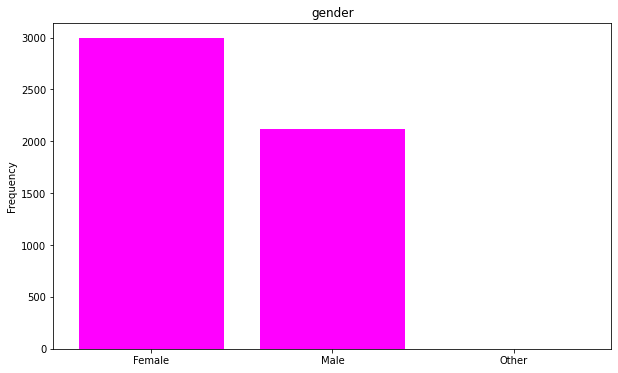

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


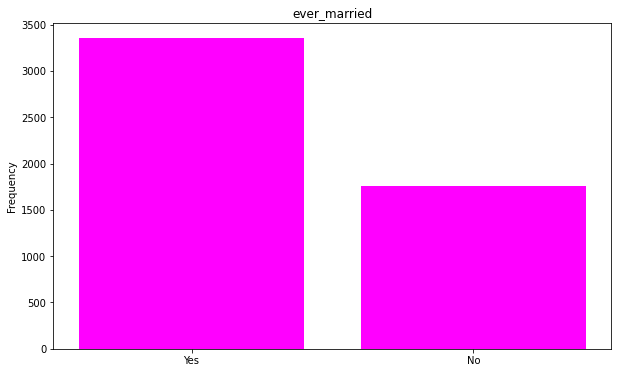

Yes    3353
No     1757
Name: ever_married, dtype: int64


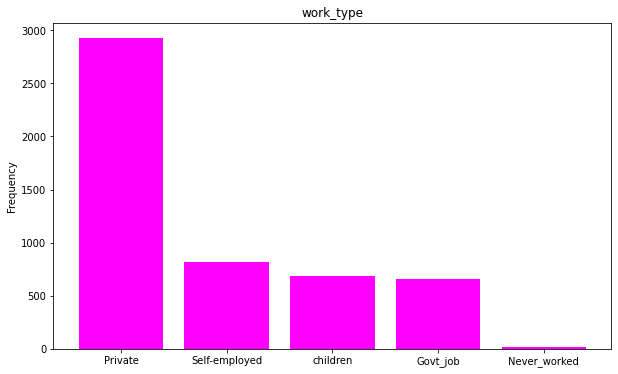

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


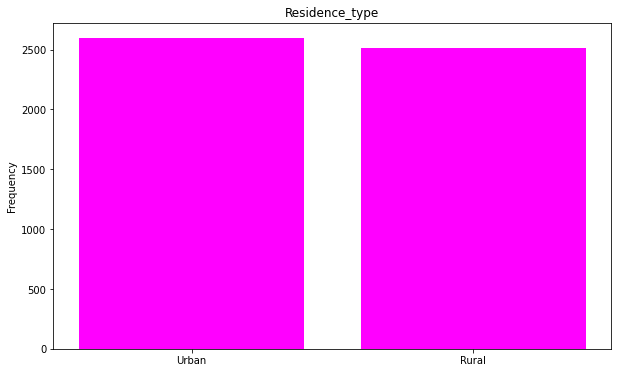

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


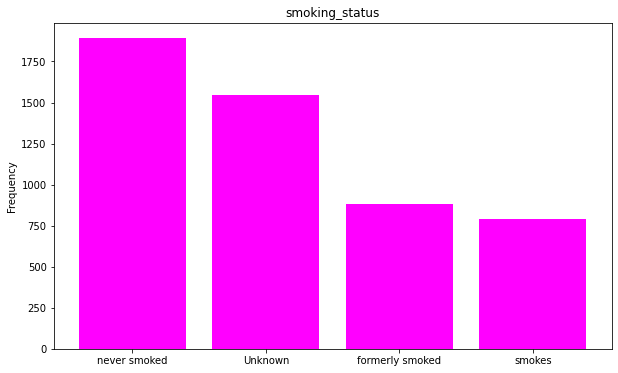

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [10]:
def plot_bar(column_name):
  column = data[column_name]
  values = column.value_counts()

  plt.figure(figsize=(10,6))
  plt.bar(values.index, values, color="magenta")
  plt.title(column_name)
  plt.ylabel("Frequency")
  plt.show()

  print(values)

for cat in categorical_var:
   plot_bar(cat)

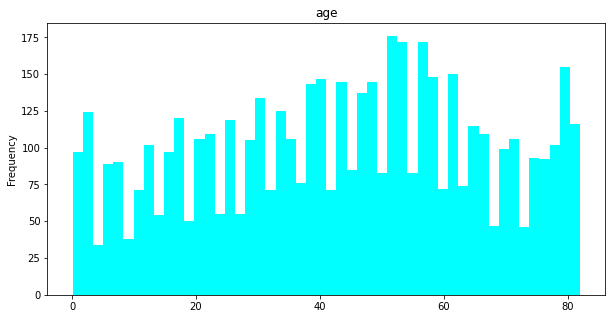

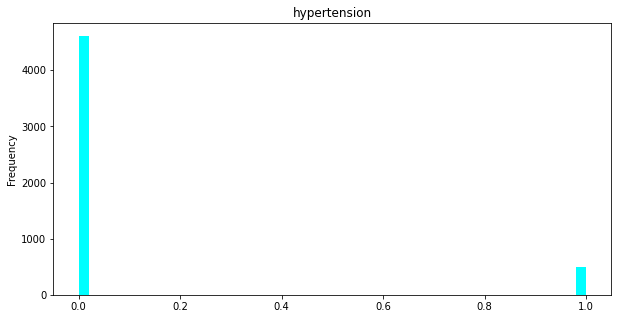

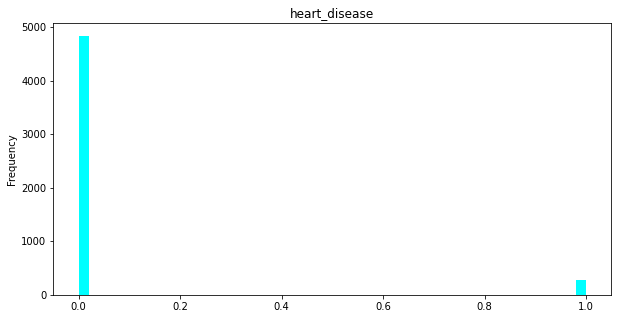

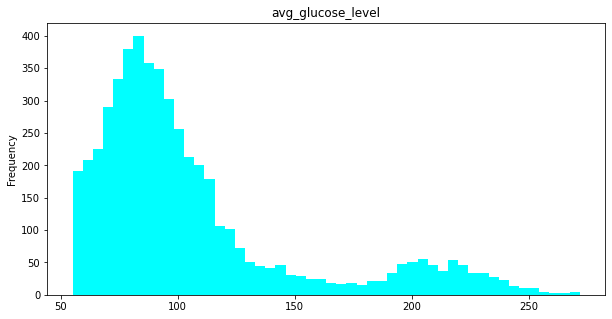

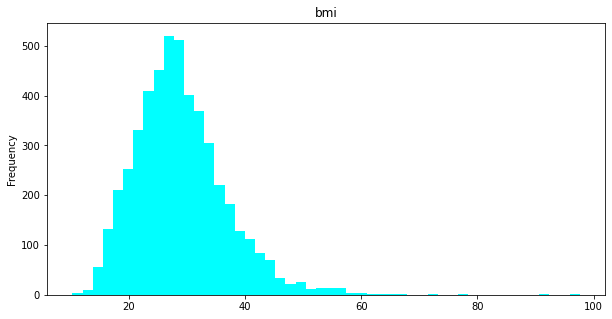

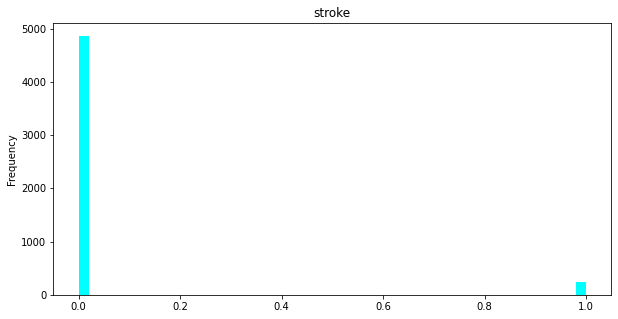

In [11]:
# numerical data visualisation
def plot_hist(col_name): 
  plt.figure(figsize=(10,5))
  plt.hist(data[col_name], bins=50, color="cyan")
  plt.ylabel("Frequency")
  plt.title(col_name)
  plt.show()

for col in numerical_var:
  plot_hist(col)

Basic age analytics

In [32]:
labels_age = ["less than 10 years", "10-20 years", "20-30 years", "30-40 years", "40-50 years", "50-60 years", "60-70 years", "70 and more"]
bins = [0,10,20,30,40,50,60,70,80]
age_df = data.groupby(pd.cut(data["age"], bins=bins, labels=labels_age)).size()
age_df = age_df.reset_index(name="count")

In [33]:
def plot_pie(df, labels, radius=2): 
  plt.pie(df["count"], labels=labels, radius=radius, autopct="%0.2f%%")
  plt.show()

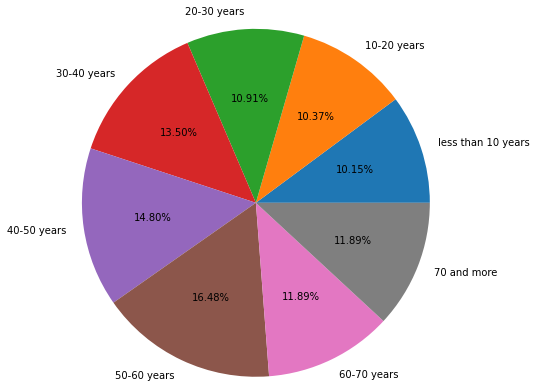

In [34]:
plot_pie(age_df, labels_age)

Basic bmi analytics

In [35]:
labels_bmi = ["underweight", "normal weight", "overweight", "obesity"]
bins_bmi = [0, 18.5, 25.0, 30.0, 50.0]
bmi_series = data.groupby(pd.cut(data["bmi"], bins=bins_bmi, labels=labels_bmi)).size()
bmi_series

bmi
underweight       349
normal weight    1258
overweight       1409
obesity          1814
dtype: int64

In [36]:
bmi_df = bmi_series.reset_index(name = "count")
bmi_df

,bmi,count
0,underweight,349
1,normal weight,1258
2,overweight,1409
3,obesity,1814


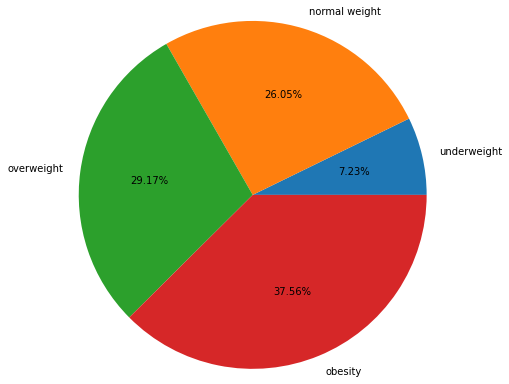

In [37]:
plot_pie(bmi_df, labels_bmi)

Glucose level in blood analytics


In [38]:
data.avg_glucose_level.describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [39]:
labels_glu = ["Hypoglycemia", "Normal", "Presiabetes", "Diabetes"]
bins_glu = [0,65,100, 200,300]
glu_series = data.groupby(pd.cut(data.avg_glucose_level, bins=bins_glu, labels=labels_glu)).size()

In [40]:
glu_series

avg_glucose_level
Hypoglycemia     446
Normal          2685
Presiabetes     1545
Diabetes         434
dtype: int64

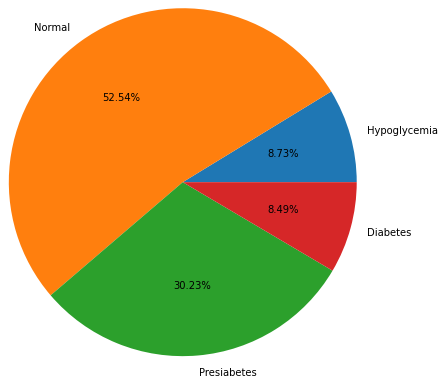

In [41]:
glu_df = glu_series.reset_index(name="count")
plot_pie(glu_df, labels_glu)

How smoking affects the stroke

In [42]:
data[["smoking_status", "stroke"]].groupby(["smoking_status"], as_index=False).mean().sort_values(by="stroke", ascending=False)

,smoking_status,stroke
1,formerly smoked,0.079096
3,smokes,0.053232
2,never smoked,0.047569
0,Unknown,0.030440


How gender affects the stroke

In [43]:
data[["gender","stroke"]].groupby(["gender"], as_index=False).mean().sort_values(by="stroke", ascending=False)

,gender,stroke
1,Male,0.051064
0,Female,0.047094
2,Other,0.000000


How being married affects the stroke



In [45]:
data[["ever_married", "stroke"]].groupby(["ever_married"], as_index=False).mean().sort_values(by="stroke", ascending=False)

,ever_married,stroke
1,Yes,0.065613
0,No,0.016505


How the work type affects the stroke


In [46]:
data[["work_type", "stroke"]].groupby(["work_type"], as_index=False).mean().sort_values(by="stroke", ascending=False)

,work_type,stroke
3,Self-employed,0.079365
2,Private,0.050940
0,Govt_job,0.050228
4,children,0.002911
1,Never_worked,0.000000


how the residence type affects the stroke  

In [47]:
data[["Residence_type", "stroke"]].groupby(["Residence_type"], as_index=False).mean().sort_values(by="stroke", ascending=False)

,Residence_type,stroke
1,Urban,0.052003
0,Rural,0.045346


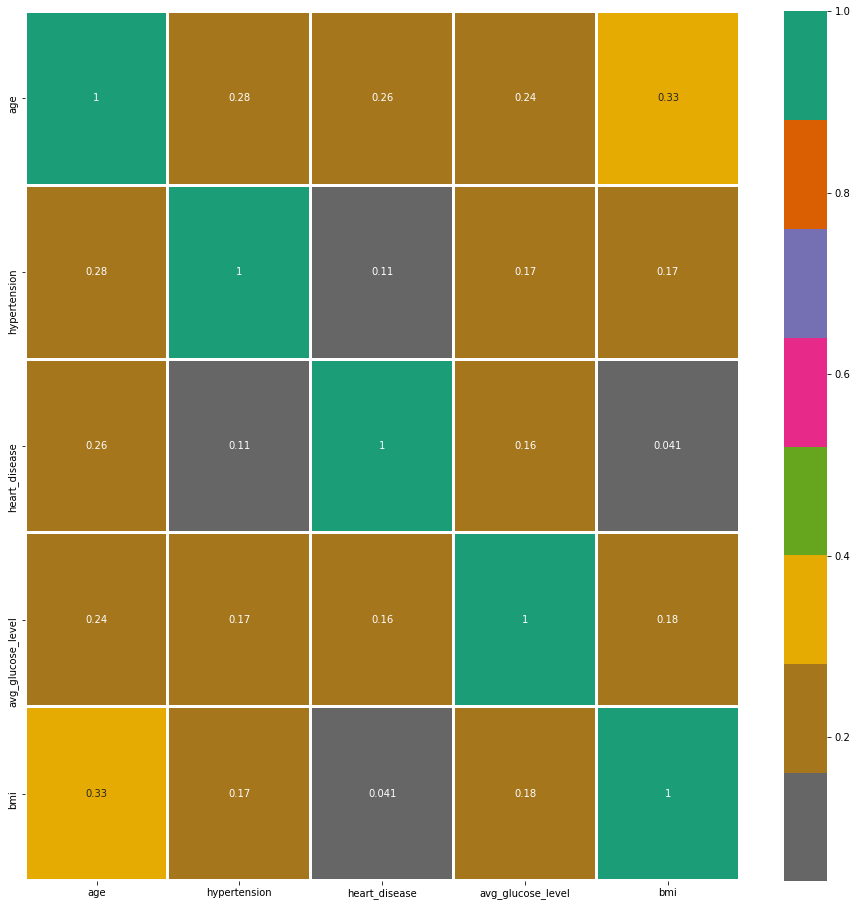

In [48]:
# Visualise the correlation between features
import seaborn as sns

features = data.loc[:, data.columns!="stroke"]
plt.figure(figsize=(16,16))
sns.heatmap(features.corr(), annot=True,  cmap='Dark2_r', linewidths=2)
plt.show()

### Viewing pairwise relationships 


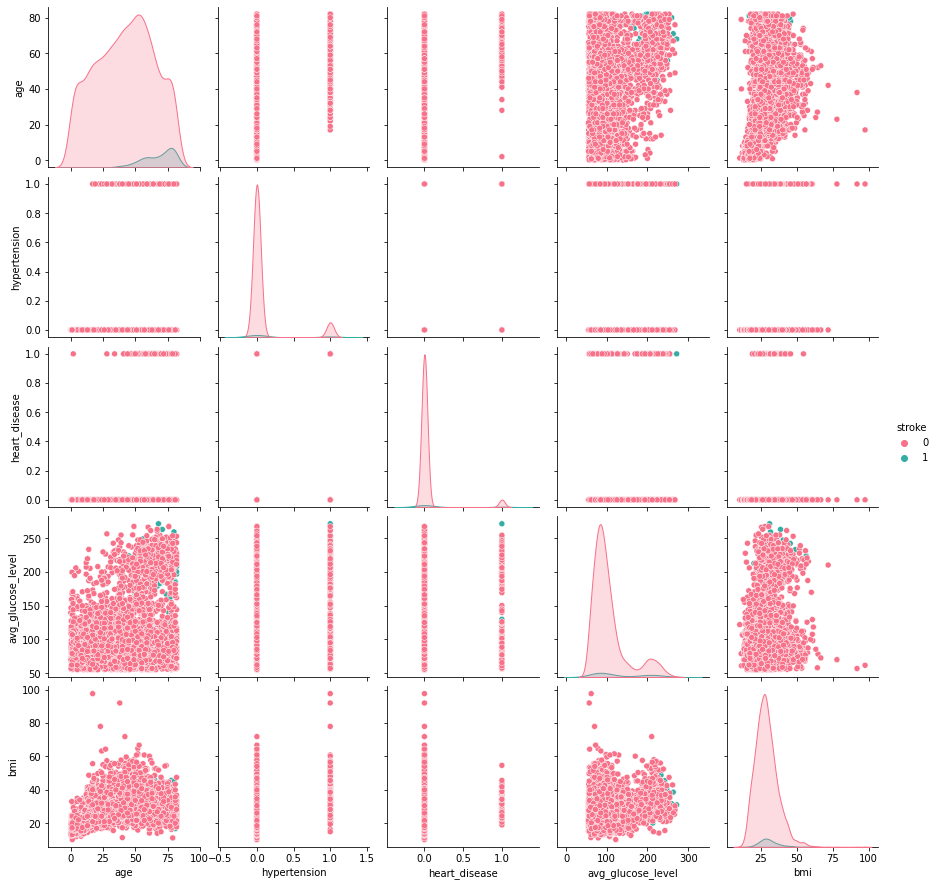

In [53]:
sns.pairplot(data, hue="stroke", diag_kind="kde", kind="scatter", palette="husl")

In [99]:
continuos_var = ["age", "avg_glucose_level", "bmi"]


def plt_kdf(df, col_name):
  plt.figure(figsize=(20,30))
  plt.subplot(6,4, i+1)
  plt.grid(True)
  plt.title(col_name)
  sns.kdeplot(data.loc[data.stroke==1, col_name],label="stroke patients", color="magenta", kernel="gau", shade=True)
  sns.kdeplot(data.loc[data.stroke==0, col_name], label="healthy patients", color="cyan", kernel="gau", shade=True)
  plt.subplot(6,4, i+2)
  sns.boxplot(y = col_name, data = data, x=data.stroke, palette = ["magenta", "cyan"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


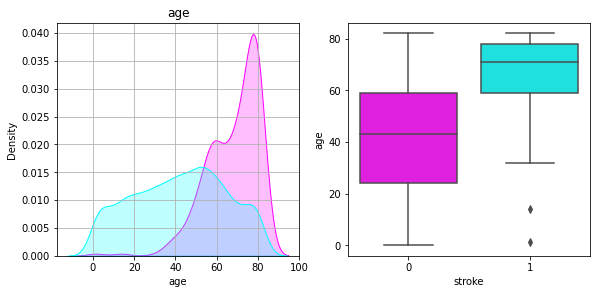

In [100]:
plt_kdf(data, "age")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


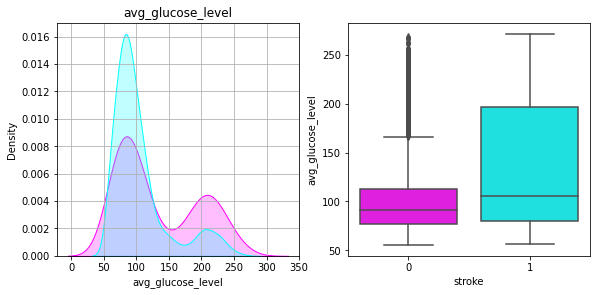

In [101]:
plt_kdf(data, "avg_glucose_level")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


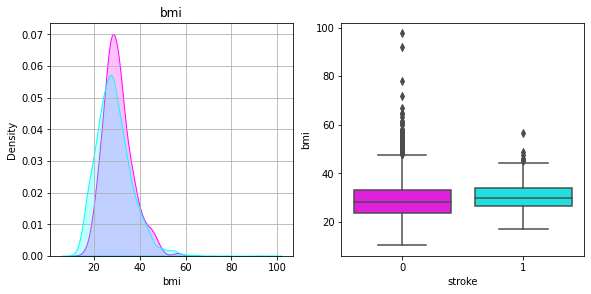

In [102]:
plt_kdf(data, "bmi")